In [1]:
import numpy as np
import xarray as xr

import matplotlib.pyplot as plt
from numpy.polynomial import polynomial
import import_ipynb
import sys
import os 

import pandas as pd
import datetime as dt
import time
import matplotlib.pyplot as plt
import seaborn as sns
import random
import tensorflow as tf

from cartopy import config
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.util import add_cyclic_point


2023-05-11 11:08:51.296817: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
def is_ndjf(month):
    return np.logical_or(month<=2, month>=11)

def is_ndjfm(month):
    return np.logical_or(month<=3, month>=11)

def is_amjj(month):
    return np.logical_and(month>=4, month<=7)

def is_amjja(month):
    return np.logical_and(month>=4, month<=8)

YEARS = '1850-1949'
STRT = pd.to_datetime('11-01-1850')
END   = pd.to_datetime('2-28-1949')  + dt.timedelta(days=1)

time_range = xr.cftime_range(str(STRT)[:10], str(END)[:10],calendar = 'noleap') #[0:10] corresponds to full datestamp
time_range_ndjf = time_range.where(is_ndjf(time_range.month)).dropna()
TIME_X = xr.DataArray(time_range_ndjf + dt.timedelta(days=0), dims=['time'])     
TIME_Y = xr.DataArray(time_range_ndjf + dt.timedelta(days=14), dims=['time'])  #below comment explains time segmentation

STRT = pd.to_datetime('04-01-1850')
END   = pd.to_datetime('07-31-1949')  + dt.timedelta(days=1)


In [6]:
DIRECTORY_IN = '/Users/marcodia/Research/Data/processed_fields/global_data/'

In [7]:
#This code is for predictand figure; commented code is for predictor figure

PRECT_full = xr.open_dataarray(DIRECTORY_IN+'PRECT_global_1850-1949_ens1_dailyanom_detrend.nc')

PRECT_wint = PRECT_full.where(PRECT_full.time == TIME_Y, drop=True)
PRECT_wint_avg = np.mean(PRECT_wint[14:27,:,:], axis=0) #take a 2-week average 

In [8]:
#Lats and lons need to be shifted half a grid box 

lats = PRECT_full.lat+1.25
lons = PRECT_full.lon+1.25

PRECT_wint_avg, cyclic_lons = add_cyclic_point(PRECT_wint_avg, coord=lons) #add cyclic point
PRECT_wint, cyclic_lons = add_cyclic_point(PRECT_wint, coord=lons) #add cyclic point

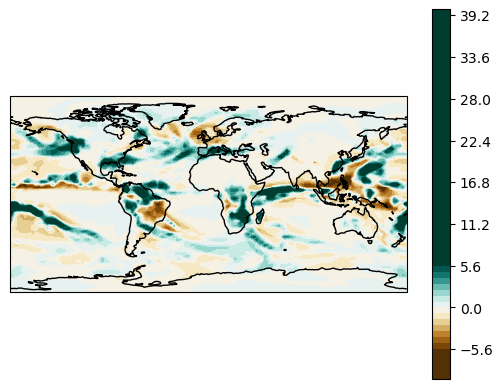

In [9]:
#Check that cyclic point is included

ax = plt.axes(projection=ccrs.PlateCarree())
plt.contourf(cyclic_lons,lats,PRECT_wint_avg, 60, transform = ccrs.PlateCarree(), cmap='BrBG', vmin=-6,vmax=6)
ax.coastlines()
plt.colorbar()
plt.show()

In [10]:
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from shapely.geometry.polygon import LinearRing

In [11]:
#Outline Grid Boxes for predictand regions

#alaska
alaska_lon1 = -157.5 #202.5
alaska_lon2 = -140   #220
alaska_lat1 = 58.75
alaska_lat2 = 63.75


alaska_lats = [alaska_lat1, alaska_lat1, alaska_lat2, alaska_lat2]
alaska_lons = [alaska_lon1, alaska_lon2, alaska_lon2, alaska_lon1]

# canada_lon1 = -127.5
# canada_lon2 = -117.5
canada_lon1 = -130
canada_lon2 = -120
canada_lat1 = 48.75
canada_lat2 = 56.25

canada_lats = [canada_lat1, canada_lat1, canada_lat2, canada_lat2]
canada_lons = [canada_lon1, canada_lon2, canada_lon2, canada_lon1]

ncanada_lon1 = -127.5 #232.5
ncanada_lon2 = -140   #220
ncanada_lat1 = 56.25
ncanada_lat2 = 63.75

ncanada_lats = [ncanada_lat1, ncanada_lat1, ncanada_lat2, ncanada_lat2]
ncanada_lons = [ncanada_lon1, ncanada_lon2, ncanada_lon2, ncanada_lon1]

pnw_lon1 = -125 #235
pnw_lon2 = -117.5 #242.5
pnw_lat1 = 41.25
pnw_lat2 = 48.75

pnw_lats = [pnw_lat1, pnw_lat1, pnw_lat2, pnw_lat2]
pnw_lons = [pnw_lon1, pnw_lon2, pnw_lon2, pnw_lon1]

cali_lon1 = -125
cali_lon2 = -117.5
cali_lat1 = 33.75
cali_lat2 = 41.25

cali_lats = [cali_lat1, cali_lat1, cali_lat2, cali_lat2]
cali_lons = [cali_lon1, cali_lon2, cali_lon2, cali_lon1]



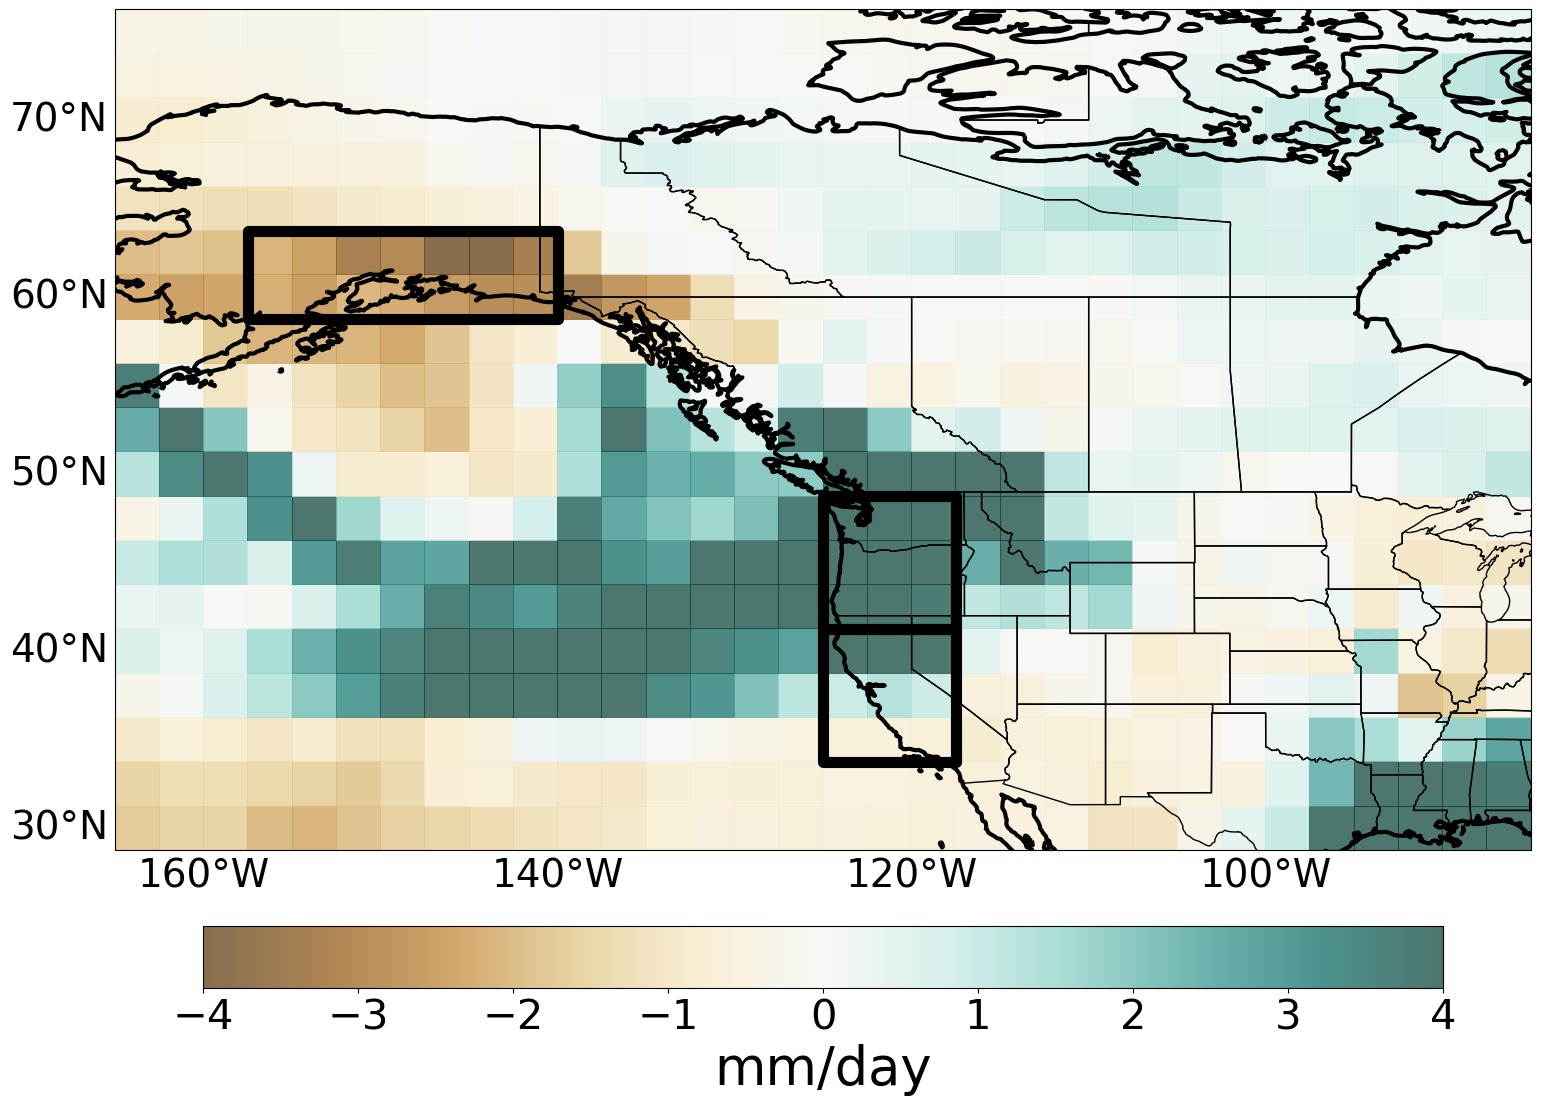

In [17]:
#This is to plot the North American boxes 

figure = plt.figure(figsize=(20,14))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=200))
ax.add_feature(cfeature.COASTLINE, linewidth=3)
ax.add_feature(cfeature.STATES)
ax.set_extent(
    [
        195, # max longitude
        275, # min longitude
        28.75, # min latitude
        76.25 # max latitude
     ],
    crs=ccrs.PlateCarree()
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.0, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.ylabels_right = False
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,20))
gl.ylocator = mticker.FixedLocator(np.arange(-90,90,10))

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
min_level = -4
max_level = 4
step_level = 1

gl.xlabel_style = {'size': 28, 'color': 'black'} #change size and color of x,y labels using cartopy formatter
gl.ylabel_style = {'size': 28, 'color': 'black'}

plt.pcolor(cyclic_lons,lats,PRECT_wint_avg, transform = ccrs.PlateCarree(), cmap ='BrBG',vmin = min_level, vmax=max_level, alpha = 0.7) #used pcolor for boxes instead of contouring

#Put Boxes Around Regions for Averaging
ring1 = LinearRing(list(zip(alaska_lons, alaska_lats)))
ax.add_geometries([ring1], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=8)

#ring2 = LinearRing(list(zip(canada_lons, canada_lats)))
#ax.add_geometries([ring2], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=8)

ring3 = LinearRing(list(zip(pnw_lons, pnw_lats)))
ax.add_geometries([ring3], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=8)

ring4 = LinearRing(list(zip(cali_lons, cali_lats)))
ax.add_geometries([ring4], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=8)

#ring5 = LinearRing(list(zip(ncanada_lons, ncanada_lats)))
#ax.add_geometries([ring5], ccrs.PlateCarree(), facecolor='none', edgecolor='black', linewidth=8)

cb = plt.colorbar(location='bottom',orientation='horizontal', ticks=np.arange(min_level, max_level + step_level, step_level), pad=0.07, shrink = 0.8)
cb.ax.tick_params(labelsize = 30)
cb.set_label(label='mm/day', size = 38)

#plt.savefig('/Users/marcodia/Research/lowfreq_S2S_project/figs_for_publication/'+'predictand_overviewplot_ens1.png',format='png',dpi=300)
plt.show()


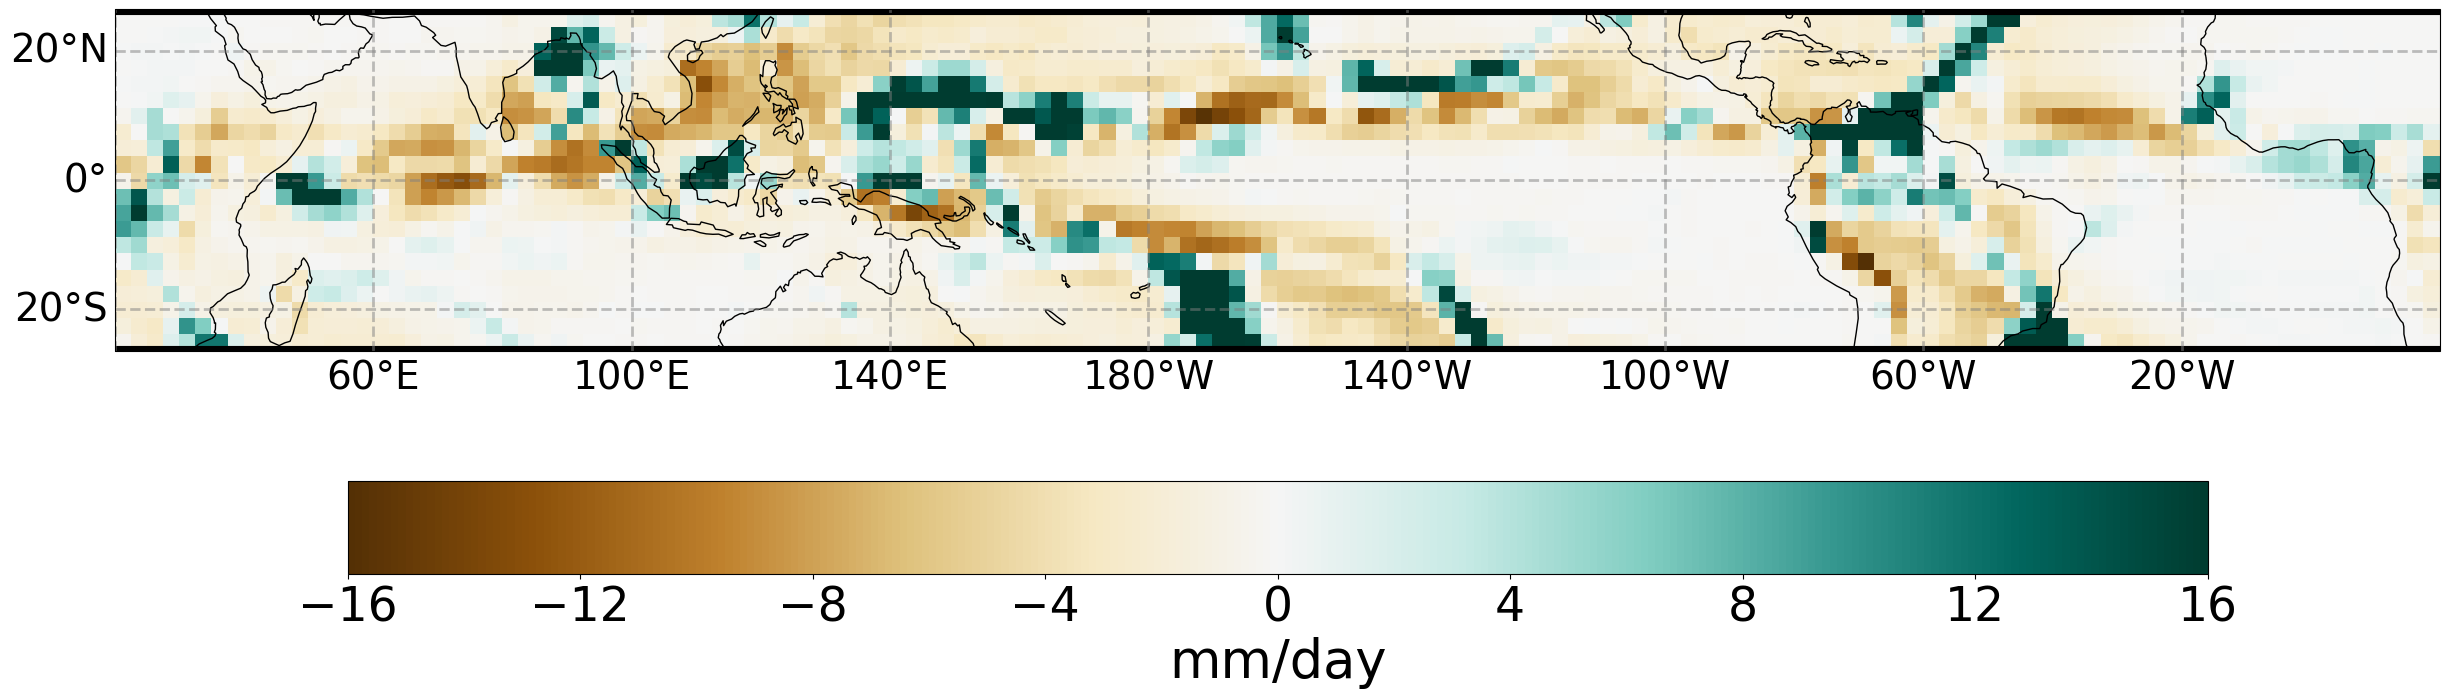

In [25]:
#Code to Plot predictor region

figure = plt.figure(figsize=(30,24))

ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=200))
ax.add_feature(cfeature.COASTLINE)
ax.set_extent(
    [
        0, # max longitude
        360, # min longitude
        -26.5, # max min
        26.5 # max latitude
    ],
    crs=ccrs.PlateCarree()
)

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=2, color='gray', alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.xlabels_bottom = True
gl.ylabels_left = True
gl.xlocator = mticker.FixedLocator(np.arange(-180,180,40))
gl.ylocator = mticker.FixedLocator(np.arange(-80,80,20))

gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

min_level = -16
max_level = 16
step_level = 4

gl.xlabel_style = {'size': 28, 'color': 'black'} #change size and color of x,y labels using cartopy formatter
gl.ylabel_style = {'size': 28, 'color': 'black'}

#plt.contourf(cyclic_lons,lats,PRECT_wint[0,:,:], 10, transform = ccrs.PlateCarree(), cmap ='BrBG', levels = np.arange(min_level, max_level + step_level, step_level), extend='both')
plt.pcolor(cyclic_lons,lats,PRECT_wint[0,:,:], transform = ccrs.PlateCarree(), cmap ='BrBG',vmin = min_level, vmax=max_level) #used pcolor for boxes instead of contouring

ax.axhline(-26.5, alpha=1.0, color='black', linewidth = 8)
ax.axhline(26.5, alpha=1.0, color='black', linewidth = 8)

cb = plt.colorbar(location='bottom',orientation='horizontal', ticks=np.arange(min_level, max_level + step_level, step_level), pad=0.07, shrink = 0.8)
cb.ax.tick_params(labelsize = 34)
cb.set_label(label='mm/day', size = 38)
#ax.coastlines()
plt.savefig('/Users/marcodia/Research/lowfreq_S2S_project/figs_for_publication/'+'predictor_overviewplot_ens1.png',format='png', dpi=300)

plt.show()
